<a href="https://colab.research.google.com/github/tsaijoy/JoyTsai/blob/main/%E3%80%90%E4%BD%9C%E6%A5%AD%E5%9B%9B%E3%80%91%E6%A8%82%E4%BA%8B%E9%A4%85%E4%B9%BE%E8%A9%95%E8%AB%96%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [5]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1qi6elEnbQgb5miFAh5I4xZ726YPnDg0TNKKmBKe5MnE/edit?gid=1946048420#gid=1946048420')
# 選擇第一個工作表
worksheet = gsheets.get_worksheet(3)

In [6]:
# 將工作表內容讀取成 DataFrame（假設評論欄位是「評論內容」）
import pandas as pd

data = worksheet.get_all_records()
df = pd.DataFrame(data)

# 顯示確認
df.head()


,ID,評論內容
0,review_1,朋友聚會必備良品
1,review_2,經典原味最對味
2,review_3,多種口味可選，永遠不膩
3,review_4,朋友聚會必備良品
4,review_5,容易碎掉，吃起來不方便


In [7]:
import jieba
import re

# 停用詞表（可以擴充）
stop_words = set(["的", "了", "啊", "你", "我", "是", "也", "就", "都", "在", "和", "但"])

# 清理與斷詞函數
def clean_and_tokenize(text):
    text = re.sub(r"[^\w\s]", "", text)  # 去除標點
    words = jieba.lcut(text)
    return [word for word in words if word not in stop_words and len(word) > 1]

# 套用處理
df["tokens"] = df["評論內容"].apply(clean_and_tokenize)
df.head()


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.870 seconds.
DEBUG:jieba:Loading model cost 0.870 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,ID,評論內容,tokens
0,review_1,朋友聚會必備良品,"[朋友, 聚會, 必備, 良品]"
1,review_2,經典原味最對味,"[經典, 原味, 最對味]"
2,review_3,多種口味可選，永遠不膩,"[多種, 口味, 可選永遠, 不膩]"
3,review_4,朋友聚會必備良品,"[朋友, 聚會, 必備, 良品]"
4,review_5,容易碎掉，吃起來不方便,"[容易, 碎掉, 起來, 方便]"


In [8]:
from collections import Counter

# 統整所有詞彙
all_words = [word for tokens in df["tokens"] for word in tokens]
word_freq = Counter(all_words)

# 顯示前 20 高頻詞
word_freq.most_common(20)


[('價格', 14),
 ('CP', 14),
 ('方便', 12),
 ('起來', 11),
 ('口味', 10),
 ('化學味', 10),
 ('太重', 10),
 ('自然', 10),
 ('容易', 9),
 ('包裝', 9),
 ('朋友', 8),
 ('聚會', 8),
 ('必備', 8),
 ('良品', 8),
 ('香夠', 7),
 ('最愛的', 7),
 ('零食', 7),
 ('之一', 7),
 ('偏高', 7),
 ('值不高', 7)]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39173 (\N{CJK UNIFIED IDEOGRAPH-9905}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20094 (\N{CJK UNIFIED IDEOGRAPH-4E7E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35413 (\N{CJK UNIFIED IDEOGRAPH-8A55}) missing from font(s) DejaVu Sans.
  fig.canvas

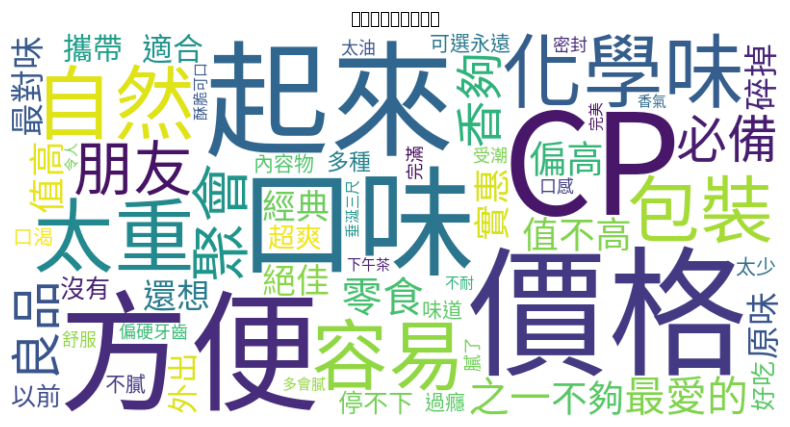

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 若需要中文字體，請先上傳如 NotoSansTC-Regular.otf
wc = WordCloud(font_path="NotoSansTC-Regular.otf", background_color="white", width=800, height=400)
wc.generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("樂事餅乾評論文字雲")
plt.show()


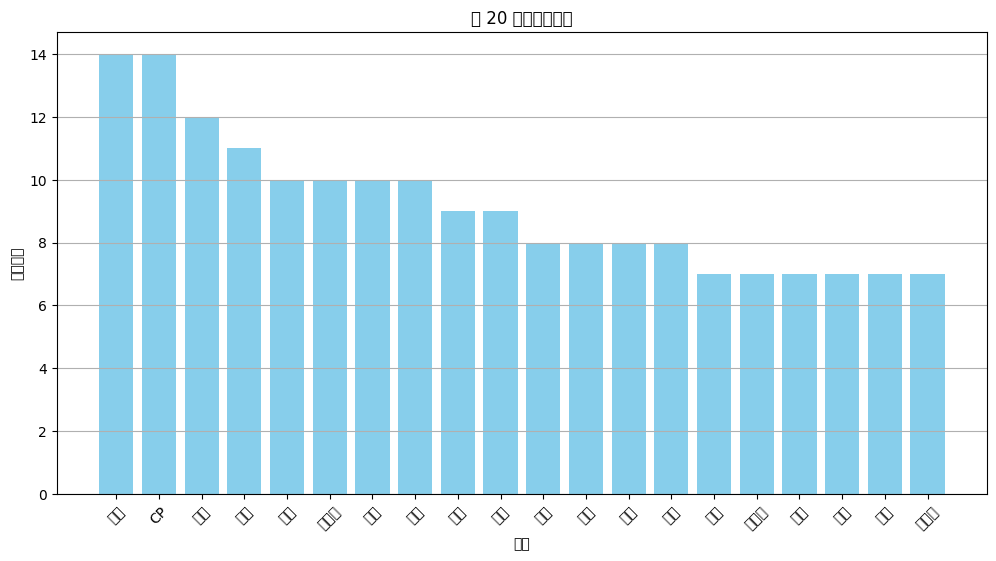

In [17]:
top_n = 20
top_words = word_freq.most_common(top_n)
words, freqs = zip(*top_words)

plt.figure(figsize=(12, 6))
plt.bar(words, freqs, color="skyblue")
plt.title("前 20 高頻詞統計圖")
plt.xlabel("詞語")
plt.ylabel("出現次數")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 樂事餅乾評論分析

## 📊 詞頻統計與文字雲
- 本分析使用樂事餅乾的顧客評論資料。
- 使用 jieba 斷詞，並去除停用詞。
- 製作文字雲與前 20 詞的詞頻長條圖。

## 📈 成果展示
- 文字雲展示消費者常用形容詞與評語。
- 長條圖提供熱門詞語的出現次數排名。

## 🔧 技術細節
- 使用 Python + pandas + jieba + wordcloud + matplotlib 套件完成。
